In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0892e6d6a5ef8838277813d2bd34fb2


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | chuy
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | itarema
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | hamilton
Processing Record 6 of Set 13 | bluff
Processing Record 7 of Set 13 | russell
Processing Record 8 of Set 13 | puro
Processing Record 9 of Set 13 | kloulklubed
Processing Record 10 of Set 13 | meulaboh
Processing Record 11 of Set 13 | hobart
Processing Record 12 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 13 | nelson bay
Processing Record 14 of Set 13 | port elizabeth
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | barrow
Processing Record 19 of Set 13 | east london
Processing Record 20 of Set 13 | luderitz
Processing Record 21 of Set 13 | provideniya
Processing Record 22 of Set 13 | port blair
Processing Record 23 of Set 13 | spassk-ryazan

Processing Record 37 of Set 16 | sambava
Processing Record 38 of Set 16 | puerto penasco
Processing Record 39 of Set 16 | murray bridge
Processing Record 40 of Set 16 | lavrentiya
Processing Record 41 of Set 16 | sataua
City not found. Skipping...
Processing Record 42 of Set 16 | katsuura
Processing Record 43 of Set 16 | graham
Processing Record 44 of Set 16 | katima mulilo
Processing Record 45 of Set 16 | payo
Processing Record 46 of Set 16 | pangnirtung
Processing Record 47 of Set 16 | saint-philippe
Processing Record 48 of Set 16 | pochutla
Processing Record 49 of Set 16 | luba
Processing Record 50 of Set 16 | san cristobal
Processing Record 1 of Set 17 | butaritari
Processing Record 2 of Set 17 | gold coast
Processing Record 3 of Set 17 | otaru
Processing Record 4 of Set 17 | faanui
Processing Record 5 of Set 17 | tokmak
Processing Record 6 of Set 17 | charters towers
Processing Record 7 of Set 17 | port augusta
Processing Record 8 of Set 17 | alta floresta
Processing Record 9 of S

Processing Record 22 of Set 20 | stokmarknes
Processing Record 23 of Set 20 | orange
Processing Record 24 of Set 20 | lufilufi
Processing Record 25 of Set 20 | olafsvik
Processing Record 26 of Set 20 | halifax
Processing Record 27 of Set 20 | fernie
Processing Record 28 of Set 20 | zhangye
Processing Record 29 of Set 20 | tsimlyansk
Processing Record 30 of Set 20 | san lorenzo
Processing Record 31 of Set 20 | constitucion
Processing Record 32 of Set 20 | houston
Processing Record 33 of Set 20 | luanda
Processing Record 34 of Set 20 | hudiksvall
Processing Record 35 of Set 20 | neiafu
Processing Record 36 of Set 20 | adrar
Processing Record 37 of Set 20 | chumikan
Processing Record 38 of Set 20 | bosaso
Processing Record 39 of Set 20 | dolores
Processing Record 40 of Set 20 | vilhena
Processing Record 41 of Set 20 | merauke
Processing Record 42 of Set 20 | taoudenni
Processing Record 43 of Set 20 | mutsamudu
City not found. Skipping...
Processing Record 44 of Set 20 | adwa
Processing Re

Processing Record 3 of Set 24 | hvide sande
Processing Record 4 of Set 24 | ingham
Processing Record 5 of Set 24 | comodoro rivadavia
Processing Record 6 of Set 24 | omsukchan
Processing Record 7 of Set 24 | edd
Processing Record 8 of Set 24 | mnogovershinnyy
Processing Record 9 of Set 24 | jarvenpaa
Processing Record 10 of Set 24 | zhigansk
Processing Record 11 of Set 24 | cervo
Processing Record 12 of Set 24 | pontianak
Processing Record 13 of Set 24 | baykit
Processing Record 14 of Set 24 | makakilo city
Processing Record 15 of Set 24 | dinsor
City not found. Skipping...
Processing Record 16 of Set 24 | union city
Processing Record 17 of Set 24 | grimshaw
Processing Record 18 of Set 24 | tuatapere
Processing Record 19 of Set 24 | yei
Processing Record 20 of Set 24 | kavaratti
Processing Record 21 of Set 24 | lishu
Processing Record 22 of Set 24 | ranong
Processing Record 23 of Set 24 | flinders
Processing Record 24 of Set 24 | wahran
City not found. Skipping...
Processing Record 25 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,62.53,85,0,2.86,UY,2021-02-07 08:39:37
1,Ushuaia,-54.8000,-68.3000,44.60,76,40,9.22,AR,2021-02-07 08:34:41
2,Itarema,-2.9248,-39.9167,74.88,91,11,7.47,BR,2021-02-07 08:48:31
3,Rikitea,-23.1203,-134.9692,77.34,74,38,11.18,PF,2021-02-07 08:39:31
4,Hamilton,39.1834,-84.5333,21.20,73,90,14.97,US,2021-02-07 08:39:02
5,Bluff,-46.6000,168.3333,57.56,88,84,8.61,NZ,2021-02-07 08:39:41
6,Russell,32.3502,-85.1999,42.80,87,90,3.44,US,2021-02-07 08:39:38
7,Puro,12.4841,123.3827,80.89,79,54,15.32,PH,2021-02-07 08:48:32
8,Kloulklubed,7.0419,134.2556,78.80,94,90,8.05,PW,2021-02-07 08:40:05
9,Meulaboh,4.1363,96.1285,85.64,65,80,7.83,ID,2021-02-07 08:39:43


In [12]:
# Reorder the columns 
new_column_city_data=['City','Country','Date','Lat','Lng','Max Temp', 'Humidity', 'Cloudiness','Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-02-07 08:39:37,-33.6971,-53.4616,62.53,85,0,2.86
1,Ushuaia,AR,2021-02-07 08:34:41,-54.8000,-68.3000,44.60,76,40,9.22
2,Itarema,BR,2021-02-07 08:48:31,-2.9248,-39.9167,74.88,91,11,7.47
3,Rikitea,PF,2021-02-07 08:39:31,-23.1203,-134.9692,77.34,74,38,11.18
4,Hamilton,US,2021-02-07 08:39:02,39.1834,-84.5333,21.20,73,90,14.97
5,Bluff,NZ,2021-02-07 08:39:41,-46.6000,168.3333,57.56,88,84,8.61
6,Russell,US,2021-02-07 08:39:38,32.3502,-85.1999,42.80,87,90,3.44
7,Puro,PH,2021-02-07 08:48:32,12.4841,123.3827,80.89,79,54,15.32
8,Kloulklubed,PW,2021-02-07 08:40:05,7.0419,134.2556,78.80,94,90,8.05
9,Meulaboh,ID,2021-02-07 08:39:43,4.1363,96.1285,85.64,65,80,7.83


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

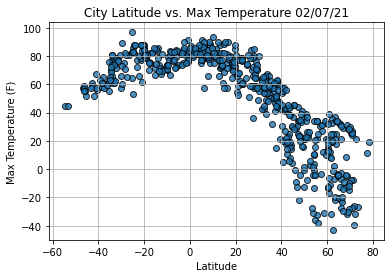

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

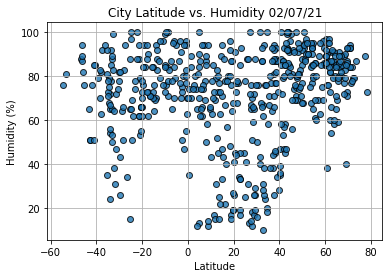

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

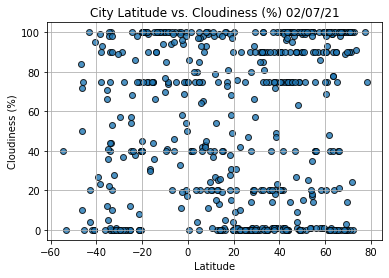

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()